## Inference on a sample image using a pre-trained YOLO model

Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\nh202\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/1 c:\Users\nh202\OneDrive - University of Arizona\Hands_on_AI-Ultralytics\03-02\apple.jpg: 384x640 4 apples, 2 oranges, 2844.0ms
Speed: 6.7ms preprocess, 2844.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict
tensor([[1.1038e+03, 3.0533e+00, 1.2792e+03, 6.2652e+02],
        [7.1048e-01, 1.9081e+00, 3.5236e+02, 7.1300e+02],
        [3.5441e+02, 4.1767e+02, 4.4689e+02, 5.1939e+02],
        [4.8020e+02, 3.2972e+02, 5.6874e+02, 4.2178e+02],
        [9.4379e+01, 5.5517e+02, 1.9904e+02, 6.6593e+02],
        [3.7959e-01, 6.1065e+02, 6.2032e+01, 7.1733e+02]])


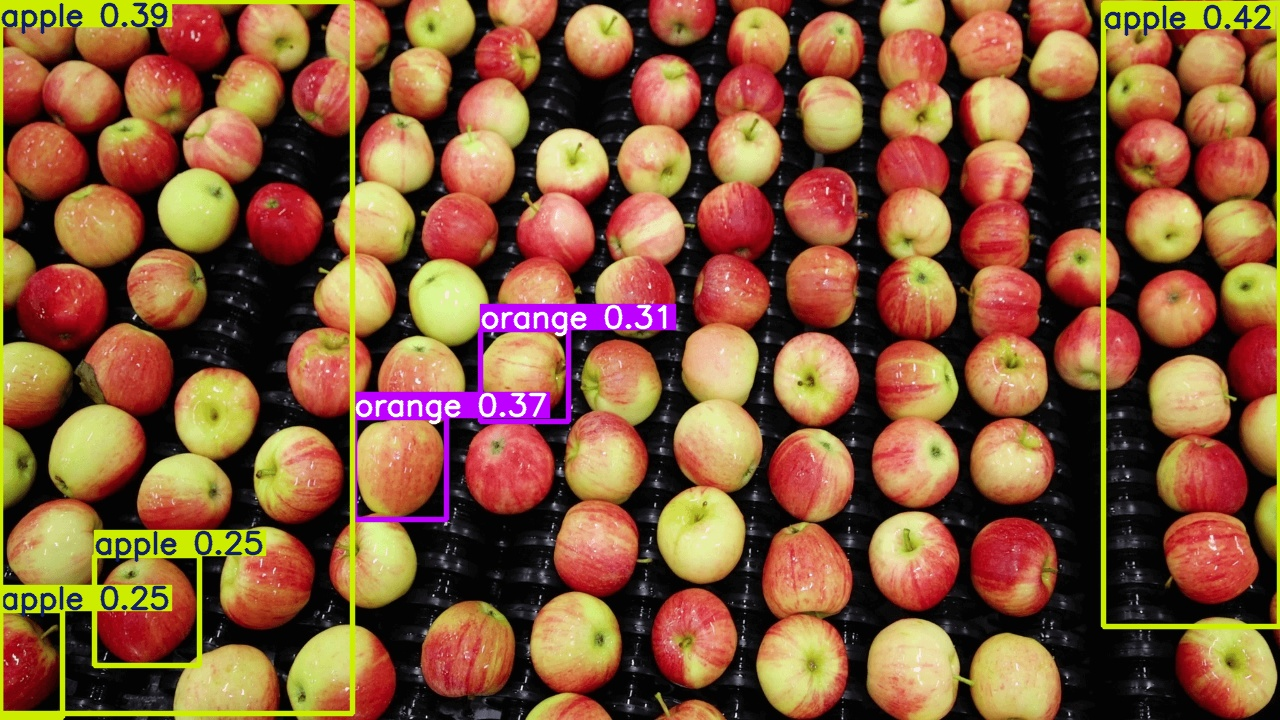

In [1]:
### Ultralytics YOLO Usage

from ultralytics import YOLO

# Load the model
# https://docs.ultralytics.com/models
model = YOLO("yolo11n.pt")

# Set the image image
image_name = "apple.jpg" 

# Use different modes
# https://docs.ultralytics.com/modes
results_bb1 = model.predict(source=image_name,
                        save=True)

# Extract the results
# https://docs.ultralytics.com/modes/predict/#working-with-results
for result in results_bb1:
    print(result.boxes.xyxy)  # Bounding box coordinates

from IPython.display import Image, display
import os

# Get save directory from the result
save_dir = results_bb1[0].save_dir  # e.g., Path('runs/predict/predict4')

# Convert input filename to .jpg for saved image
base_name = os.path.splitext(os.path.basename(image_name))[0]  
saved_image_name = base_name + ".jpg"                          
image_path = os.path.join(save_dir, saved_image_name)

# Display saved image
display(Image(filename=image_path))


**Observation:** The model does not perform a good job detecting the apples on the conveyor.

## Training a custom YOLO model on an apple dataset

Uses the dataset defined in data.yaml

In [3]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")

model.train(
    data="data.yaml",
    batch=16,
    workers=1,
    epochs=100, # Number of epochs to train (100 was used in the original code)
)

New https://pypi.org/project/ultralytics/8.3.175 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.91  Python-3.11.9 torch-2.7.0+cpu CPU (13th Gen Intel Core(TM) i9-13900HX)
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=1, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False,

100%|██████████| 755k/755k [00:00<00:00, 2.52MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning C:\Users\nh202\OneDrive - University of Arizona\Hands_on_AI-Ultralytics\03-02\dataset\train\labels... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<00:00, 76.78it/s]

train: New cache created: C:\Users\nh202\OneDrive - University of Arizona\Hands_on_AI-Ultralytics\03-02\dataset\train\labels.cache



C:\Users\nh202\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
val: Scanning C:\Users\nh202\OneDrive - University of Arizona\Hands_on_AI-Ultralytics\03-02\dataset\val\labels... 2 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2/2 [00:00<00:00, 142.67it/s]

val: New cache created: C:\Users\nh202\OneDrive - University of Arizona\Hands_on_AI-Ultralytics\03-02\dataset\val\labels.cache



C:\Users\nh202\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Plotting labels to runs\detect\train2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      1.072      3.501      1.142        891        640: 100%|██████████| 2/2 [00:11<00:00,  5.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]

                   all          2        241      0.158      0.394      0.111     0.0725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100         0G     0.9084      3.466      1.161        642        640: 100%|██████████| 2/2 [00:04<00:00,  2.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]

                   all          2        241      0.192      0.477      0.144      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100         0G     0.7652      3.445      1.101        728        640: 100%|██████████| 2/2 [00:04<00:00,  2.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.23it/s]

                   all          2        241      0.257      0.639      0.217      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100         0G     0.7335      3.438      1.045        880        640: 100%|██████████| 2/2 [00:04<00:00,  2.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.11it/s]

                   all          2        241       0.32      0.797      0.308      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100         0G     0.6498       3.26      1.006        628        640: 100%|██████████| 2/2 [00:04<00:00,  2.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]

                   all          2        241      0.365      0.909      0.401      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100         0G     0.6412      3.228     0.9803        664        640: 100%|██████████| 2/2 [00:05<00:00,  2.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]

                   all          2        241       0.37      0.921      0.447      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100         0G      0.633      3.146     0.9443        749        640: 100%|██████████| 2/2 [00:04<00:00,  2.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]

                   all          2        241      0.377      0.938      0.469      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100         0G     0.6174      3.057     0.9295        788        640: 100%|██████████| 2/2 [00:04<00:00,  2.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]

                   all          2        241      0.383      0.954      0.489       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100         0G     0.5508      2.843      0.903        618        640: 100%|██████████| 2/2 [00:05<00:00,  2.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]

                   all          2        241      0.383      0.954      0.498      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100         0G     0.5859      2.867     0.9032        779        640: 100%|██████████| 2/2 [00:04<00:00,  2.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.85it/s]

                   all          2        241      0.383      0.954      0.539      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100         0G     0.6091      2.772     0.8922        969        640: 100%|██████████| 2/2 [00:05<00:00,  2.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]

                   all          2        241      0.383      0.954      0.547      0.462

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     12/100         0G     0.5684      2.684     0.8922        728        640: 100%|██████████| 2/2 [00:05<00:00,  2.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]

                   all          2        241      0.383      0.954      0.553      0.471

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     13/100         0G     0.6076      2.692     0.8816        818        640: 100%|██████████| 2/2 [00:05<00:00,  2.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all          2        241      0.385      0.959      0.544      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100         0G     0.6071      2.465      0.883        630        640: 100%|██████████| 2/2 [00:06<00:00,  3.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]

                   all          2        241      0.383      0.954      0.545      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     15/100         0G     0.6062      2.326     0.8864        641        640: 100%|██████████| 2/2 [00:04<00:00,  2.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.57it/s]

                   all          2        241      0.382       0.95      0.542      0.412

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     16/100         0G     0.6226      2.273     0.8789        655        640: 100%|██████████| 2/2 [00:04<00:00,  2.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.83it/s]

                   all          2        241      0.382       0.95      0.538      0.408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     17/100         0G      0.708      2.359     0.8715       1075        640: 100%|██████████| 2/2 [00:04<00:00,  2.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.82it/s]

                   all          2        241      0.382       0.95      0.556      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100         0G     0.6486      2.267     0.8598        943        640: 100%|██████████| 2/2 [00:04<00:00,  2.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]

                   all          2        241      0.375      0.934      0.542      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100         0G     0.6461      2.114     0.8671        805        640: 100%|██████████| 2/2 [00:04<00:00,  2.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.83it/s]

                   all          2        241      0.368      0.917      0.546      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100         0G     0.6314      1.939     0.8609        705        640: 100%|██████████| 2/2 [00:04<00:00,  2.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.23it/s]

                   all          2        241       0.37      0.921      0.558      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100         0G     0.5793      1.782     0.8622        607        640: 100%|██████████| 2/2 [00:04<00:00,  2.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]

                   all          2        241      0.368      0.917      0.566      0.391

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     22/100         0G      0.764       1.82      0.872       1005        640: 100%|██████████| 2/2 [00:04<00:00,  2.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

                   all          2        241      0.367      0.913      0.567      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100         0G     0.6264      1.678      0.857        743        640: 100%|██████████| 2/2 [00:05<00:00,  2.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all          2        241      0.367      0.913       0.58      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100         0G     0.6277      1.529      0.867        826        640: 100%|██████████| 2/2 [00:05<00:00,  2.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]

                   all          2        241      0.368      0.917      0.604      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     25/100         0G     0.5999      1.605     0.8554       1041        640: 100%|██████████| 2/2 [00:05<00:00,  2.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.07it/s]

                   all          2        241      0.368      0.917      0.634      0.451

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     26/100         0G     0.6366      1.335     0.8747        597        640: 100%|██████████| 2/2 [00:05<00:00,  2.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]

                   all          2        241      0.373      0.929      0.674      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100         0G     0.6248      1.406     0.8472        860        640: 100%|██████████| 2/2 [00:05<00:00,  2.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.90it/s]

                   all          2        241      0.375      0.934      0.712      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100         0G     0.5958      1.234     0.8491        814        640: 100%|██████████| 2/2 [00:05<00:00,  2.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]

                   all          2        241      0.375      0.934      0.712      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100         0G     0.6161       1.31       0.87        595        640: 100%|██████████| 2/2 [00:04<00:00,  2.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.38it/s]

                   all          2        241      0.458      0.736      0.749      0.613

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     30/100         0G     0.6849      1.377     0.8457       1257        640: 100%|██████████| 2/2 [00:05<00:00,  2.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.67it/s]

                   all          2        241      0.775      0.587      0.767      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100         0G     0.5979       1.15     0.8485        868        640: 100%|██████████| 2/2 [00:04<00:00,  2.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.24it/s]

                   all          2        241      0.775      0.587      0.767      0.645

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     32/100         0G     0.6535       1.22     0.8571       1102        640: 100%|██████████| 2/2 [00:04<00:00,  2.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.03it/s]

                   all          2        241      0.854      0.515      0.774       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100         0G     0.5208      1.022       0.85        637        640: 100%|██████████| 2/2 [00:04<00:00,  2.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.74it/s]

                   all          2        241      0.869      0.556      0.796      0.651

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     34/100         0G     0.6566      1.103     0.8455       1109        640: 100%|██████████| 2/2 [00:04<00:00,  2.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.97it/s]

                   all          2        241      0.869      0.556      0.796      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100         0G     0.5259     0.9321     0.8376        731        640: 100%|██████████| 2/2 [00:03<00:00,  1.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all          2        241      0.882      0.556      0.811      0.697

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     36/100         0G      0.531     0.9464     0.8482        628        640: 100%|██████████| 2/2 [00:04<00:00,  2.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.65it/s]

                   all          2        241      0.897      0.544      0.859      0.713

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     37/100         0G     0.5766      0.995     0.8296       1035        640: 100%|██████████| 2/2 [00:04<00:00,  2.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.61it/s]

                   all          2        241      0.897      0.544      0.859      0.713

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     38/100         0G      0.559     0.9184      0.834        772        640: 100%|██████████| 2/2 [00:04<00:00,  2.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.75it/s]

                   all          2        241      0.833       0.66      0.884      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100         0G     0.5301     0.9157     0.8363        665        640: 100%|██████████| 2/2 [00:04<00:00,  2.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.76it/s]

                   all          2        241      0.825      0.802      0.899      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100         0G     0.5895      1.007     0.8394       1284        640: 100%|██████████| 2/2 [00:04<00:00,  2.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]

                   all          2        241      0.825      0.802      0.899      0.791

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     41/100         0G     0.5492     0.8685     0.8284       1022        640: 100%|██████████| 2/2 [00:04<00:00,  2.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.79it/s]

                   all          2        241      0.863      0.892      0.933      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100         0G     0.5433      0.786     0.8339        821        640: 100%|██████████| 2/2 [00:04<00:00,  2.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.08it/s]

                   all          2        241      0.902      0.953      0.965      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100         0G      0.563     0.8798     0.8423        997        640: 100%|██████████| 2/2 [00:04<00:00,  2.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all          2        241      0.902      0.953      0.965      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100         0G     0.5113     0.7389     0.8373        545        640: 100%|██████████| 2/2 [00:04<00:00,  2.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all          2        241      0.959      0.974      0.984      0.883

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     45/100         0G     0.5031     0.7349     0.8363        628        640: 100%|██████████| 2/2 [00:04<00:00,  2.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

                   all          2        241      0.959      0.974      0.984      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100         0G      0.516     0.7771      0.837        652        640: 100%|██████████| 2/2 [00:04<00:00,  2.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all          2        241      0.975      0.983      0.992      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100         0G     0.5049     0.8433     0.8289       1037        640: 100%|██████████| 2/2 [00:04<00:00,  2.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.74it/s]

                   all          2        241      0.975      0.983      0.992      0.896

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     48/100         0G     0.5518     0.7464     0.8274        730        640: 100%|██████████| 2/2 [00:04<00:00,  2.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.38it/s]

                   all          2        241      0.983      0.988      0.995      0.902

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     49/100         0G     0.5099     0.7293     0.8265        877        640: 100%|██████████| 2/2 [00:04<00:00,  2.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.79it/s]

                   all          2        241      0.983      0.988      0.995      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100         0G     0.5292     0.7331     0.8318        869        640: 100%|██████████| 2/2 [00:04<00:00,  2.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]

                   all          2        241      0.992      0.988      0.995      0.911

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     51/100         0G     0.4694     0.6918     0.8181        820        640: 100%|██████████| 2/2 [00:04<00:00,  2.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]

                   all          2        241      0.992      0.988      0.995      0.911

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     52/100         0G     0.5287     0.7257     0.8585        471        640: 100%|██████████| 2/2 [00:04<00:00,  2.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]

                   all          2        241      0.991      0.992      0.995      0.923

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     53/100         0G     0.4996     0.6793     0.8231        717        640: 100%|██████████| 2/2 [00:04<00:00,  2.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.74it/s]

                   all          2        241      0.991      0.992      0.995      0.923

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     54/100         0G     0.5345     0.7147     0.8266        886        640: 100%|██████████| 2/2 [00:04<00:00,  2.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]

                   all          2        241      0.992      0.992      0.995      0.933

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     55/100         0G     0.5011     0.7279     0.8262        939        640: 100%|██████████| 2/2 [00:04<00:00,  2.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]

                   all          2        241      0.992      0.992      0.995      0.933

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     56/100         0G     0.4784     0.7049     0.8274        728        640: 100%|██████████| 2/2 [00:04<00:00,  2.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.83it/s]

                   all          2        241      0.992      0.991      0.995      0.936

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     57/100         0G     0.5146     0.6391     0.8437        803        640: 100%|██████████| 2/2 [00:04<00:00,  2.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all          2        241      0.992      0.991      0.995      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100         0G     0.4641     0.6249      0.833        619        640: 100%|██████████| 2/2 [00:04<00:00,  2.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]

                   all          2        241       0.99      0.992      0.995      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100         0G     0.4845     0.6931     0.8299        817        640: 100%|██████████| 2/2 [00:04<00:00,  2.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.51it/s]

                   all          2        241       0.99      0.992      0.995      0.938

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     60/100         0G     0.4921     0.6604     0.8349        583        640: 100%|██████████| 2/2 [00:04<00:00,  2.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]

                   all          2        241      0.991      0.992      0.995      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100         0G     0.4562      0.663     0.8255        766        640: 100%|██████████| 2/2 [00:04<00:00,  2.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.21it/s]

                   all          2        241      0.991      0.992      0.995      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100         0G     0.4448     0.6335     0.8227        639        640: 100%|██████████| 2/2 [00:04<00:00,  2.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.68it/s]

                   all          2        241      0.987      0.992      0.995      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100         0G     0.4495     0.6258      0.824        641        640: 100%|██████████| 2/2 [00:04<00:00,  2.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.19it/s]

                   all          2        241      0.987      0.992      0.995      0.917

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     64/100         0G      0.473      0.635     0.8322        600        640: 100%|██████████| 2/2 [00:04<00:00,  2.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all          2        241      0.992       0.99      0.995       0.93

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     65/100         0G     0.4628     0.6218     0.8155        844        640: 100%|██████████| 2/2 [00:04<00:00,  2.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]

                   all          2        241      0.992       0.99      0.995       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100         0G     0.4859     0.6007     0.8108        928        640: 100%|██████████| 2/2 [00:04<00:00,  2.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.97it/s]

                   all          2        241      0.991      0.992      0.995      0.929

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     67/100         0G      0.444     0.5938     0.8263        529        640: 100%|██████████| 2/2 [00:04<00:00,  2.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.23it/s]

                   all          2        241      0.991      0.992      0.995      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100         0G     0.4906     0.6581     0.8126       1018        640: 100%|██████████| 2/2 [00:04<00:00,  2.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.07it/s]

                   all          2        241      0.991      0.992      0.995      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100         0G      0.471     0.6615     0.8226        986        640: 100%|██████████| 2/2 [00:04<00:00,  2.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.90it/s]

                   all          2        241      0.991      0.992      0.995      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100         0G     0.4164     0.5909     0.8216        768        640: 100%|██████████| 2/2 [00:04<00:00,  2.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.77it/s]

                   all          2        241       0.99      0.992      0.995      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100         0G     0.4693     0.6626     0.8153        996        640: 100%|██████████| 2/2 [00:04<00:00,  2.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.67it/s]

                   all          2        241       0.99      0.992      0.995      0.945

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     72/100         0G     0.4048     0.5168     0.8204        515        640: 100%|██████████| 2/2 [00:04<00:00,  2.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.26it/s]

                   all          2        241       0.99      0.992      0.995      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100         0G     0.4409     0.6187     0.8231        999        640: 100%|██████████| 2/2 [00:04<00:00,  2.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.15it/s]

                   all          2        241       0.99      0.992      0.995      0.933

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     74/100         0G     0.4479     0.6688     0.8223       1107        640: 100%|██████████| 2/2 [00:04<00:00,  2.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]

                   all          2        241      0.992      0.988      0.995      0.928

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     75/100         0G     0.5481     0.7733     0.8313       1494        640: 100%|██████████| 2/2 [00:04<00:00,  2.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]

                   all          2        241      0.992      0.988      0.995      0.928

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     76/100         0G     0.4182     0.5292     0.8153        604        640: 100%|██████████| 2/2 [00:04<00:00,  2.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]

                   all          2        241      0.993      0.988      0.995      0.937

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     77/100         0G     0.4197     0.5496     0.8205        645        640: 100%|██████████| 2/2 [00:04<00:00,  2.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.64it/s]

                   all          2        241      0.993      0.988      0.995      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100         0G     0.4289     0.6448     0.8194        906        640: 100%|██████████| 2/2 [00:04<00:00,  2.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]

                   all          2        241      0.993      0.988      0.995      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100         0G     0.4194     0.5476     0.8244        740        640: 100%|██████████| 2/2 [00:04<00:00,  2.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.35it/s]

                   all          2        241      0.993      0.988      0.995      0.941

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     80/100         0G     0.4202     0.5719     0.8101        828        640: 100%|██████████| 2/2 [00:04<00:00,  2.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]

                   all          2        241      0.992      0.988      0.995      0.943

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     81/100         0G      0.444     0.6239     0.8196       1126        640: 100%|██████████| 2/2 [00:04<00:00,  2.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.66it/s]

                   all          2        241      0.992      0.988      0.995      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100         0G     0.4197     0.6147     0.8162       1115        640: 100%|██████████| 2/2 [00:04<00:00,  2.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]

                   all          2        241      0.992      0.988      0.995      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100         0G     0.4092     0.5573     0.8235        560        640: 100%|██████████| 2/2 [00:04<00:00,  2.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]

                   all          2        241      0.992      0.988      0.995      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100         0G     0.4782     0.6391     0.8116       1201        640: 100%|██████████| 2/2 [00:04<00:00,  2.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.46it/s]

                   all          2        241      0.995      0.988      0.995       0.94

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     85/100         0G     0.4183     0.5664     0.8104        967        640: 100%|██████████| 2/2 [00:04<00:00,  2.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.78it/s]

                   all          2        241      0.995      0.988      0.995       0.94



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100         0G     0.4492     0.6792     0.8114       1020        640: 100%|██████████| 2/2 [00:04<00:00,  2.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]

                   all          2        241      0.996      0.987      0.995      0.935

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     87/100         0G     0.4272      0.528     0.8125        824        640: 100%|██████████| 2/2 [00:04<00:00,  2.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.59it/s]

                   all          2        241      0.996      0.987      0.995      0.935

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     88/100         0G     0.4161     0.5713     0.8139        784        640: 100%|██████████| 2/2 [00:04<00:00,  2.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.13it/s]

                   all          2        241      0.995      0.988      0.995      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100         0G     0.4892     0.6208     0.8427        358        640: 100%|██████████| 2/2 [00:04<00:00,  2.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]

                   all          2        241      0.995      0.988      0.995      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100         0G     0.4159     0.6118     0.8185        942        640: 100%|██████████| 2/2 [00:04<00:00,  2.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.02it/s]

                   all          2        241      0.994      0.988      0.995      0.942
Closing dataloader mosaic



C:\Users\nh202\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100         0G     0.4447     0.4732     0.8052        427        640: 100%|██████████| 2/2 [00:03<00:00,  1.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.54it/s]

                   all          2        241      0.994      0.988      0.995      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100         0G      0.428     0.4566     0.8047        416        640: 100%|██████████| 2/2 [00:03<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.11it/s]

                   all          2        241      0.992       0.99      0.995      0.941

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     93/100         0G     0.4136     0.4737     0.7962        465        640: 100%|██████████| 2/2 [00:03<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]

                   all          2        241      0.992       0.99      0.995      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100         0G      0.414     0.4552     0.7969        450        640: 100%|██████████| 2/2 [00:03<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.02it/s]

                   all          2        241      0.991      0.992      0.995      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100         0G     0.4131     0.4484      0.799        452        640: 100%|██████████| 2/2 [00:03<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.24it/s]

                   all          2        241      0.991      0.992      0.995      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100         0G     0.4241     0.4631     0.7995        423        640: 100%|██████████| 2/2 [00:03<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.89it/s]

                   all          2        241      0.991      0.992      0.995      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100         0G     0.3853     0.4253     0.8015        411        640: 100%|██████████| 2/2 [00:03<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]

                   all          2        241      0.991      0.992      0.995      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100         0G     0.3956     0.4249     0.7979        428        640: 100%|██████████| 2/2 [00:03<00:00,  1.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.97it/s]

                   all          2        241      0.985      0.992      0.995      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100         0G     0.3813     0.4141     0.8024        433        640: 100%|██████████| 2/2 [00:03<00:00,  1.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.06it/s]

                   all          2        241      0.985      0.992      0.995      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100         0G     0.4035     0.4608     0.8219        378        640: 100%|██████████| 2/2 [00:03<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.87it/s]

                   all          2        241      0.984      0.995      0.995      0.946



100 epochs completed in 0.136 hours.
Optimizer stripped from runs\detect\train2\weights\last.pt, 5.5MB
Optimizer stripped from runs\detect\train2\weights\best.pt, 5.5MB

Validating runs\detect\train2\weights\best.pt...
Ultralytics 8.3.91  Python-3.11.9 torch-2.7.0+cpu CPU (13th Gen Intel Core(TM) i9-13900HX)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]


                   all          2        241      0.993      0.988      0.995      0.947
Speed: 0.4ms preprocess, 61.1ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs\detect\train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000223DA1A74D0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

## Evaluating the trained model on images

WARNING  'line_thickness' is deprecated and will be removed in in the future. Use 'line_width' instead.

image 1/1 c:\Users\nh202\OneDrive - University of Arizona\Hands_on_AI-Ultralytics\03-02\apple.jpg: 384x640 127 apples, 73.8ms
Speed: 3.0ms preprocess, 73.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict2
tensor([[7.7107e+02, 3.2868e+02, 8.6285e+02, 4.2715e+02],
        [5.1669e+01, 1.8038e+02, 1.4656e+02, 2.6809e+02],
        [3.1243e+02, 2.5139e+02, 3.9855e+02, 3.3612e+02],
        [1.5531e+02, 1.6509e+02, 2.4203e+02, 2.5385e+02],
        [5.3365e+02, 1.2570e+02, 6.1112e+02, 2.0103e+02],
        [6.7940e+02, 3.2014e+02, 7.6086e+02, 4.0318e+02],
        [3.3213e+02, 1.7884e+02, 4.1719e+02, 2.6169e+02],
        [7.9510e+01, 3.2036e+02, 1.7630e+02, 4.1503e+02],
        [1.2478e+02, 2.4546e+02, 2.0976e+02, 3.3090e+02],
        [6.0435e+02, 1.9004e+02, 6.8742e+02, 2.6424e+02],
        [4.9716e+02, 2.5488e+02, 5.7944e+02, 3.3535e+0

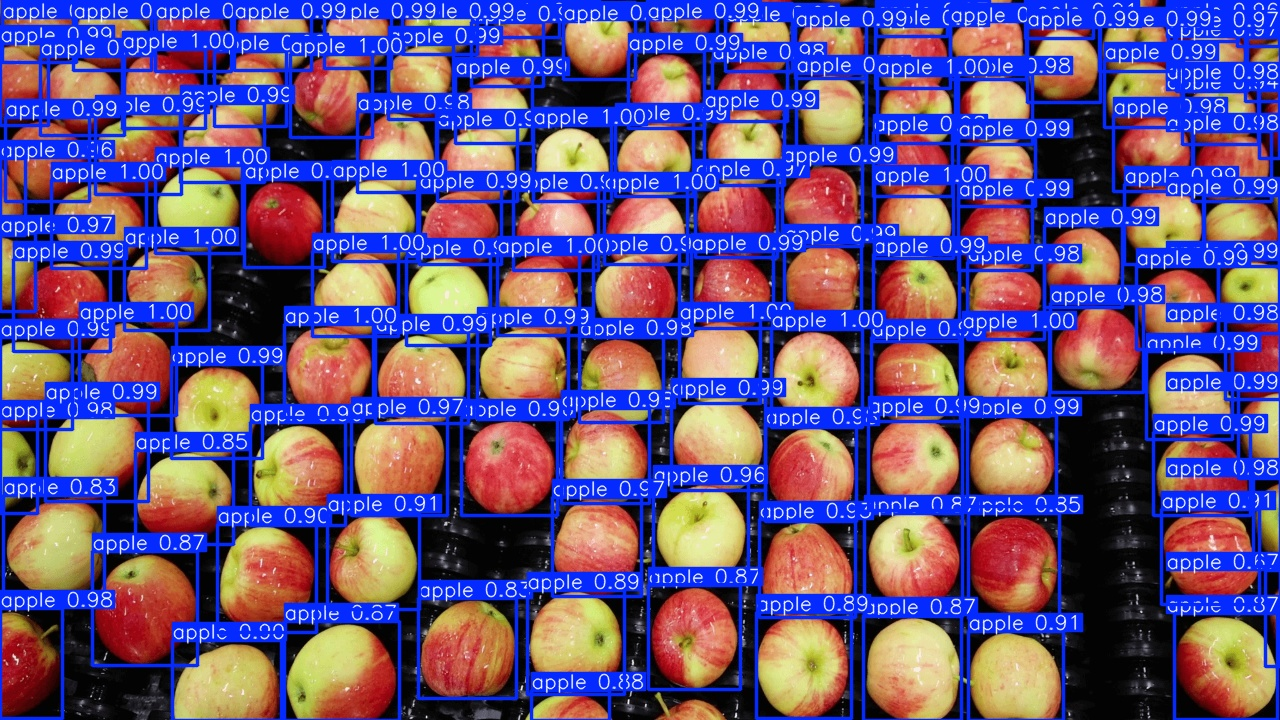

In [6]:
from ultralytics import YOLO

# trained_model = YOLO("runs/detect/train2/weights/best.pt")
trained_model = YOLO("runs/detect/train2/weights/yolo11n-apple.pt")

# Set the image image
image_name = "apple.jpg" 

# Use different modes
# https://docs.ultralytics.com/modes
results_bb2 = trained_model.predict(source=image_name,
                        save=True, line_thickness=2)

# Extract the results
# https://docs.ultralytics.com/modes/predict/#working-with-results
for result in results_bb2:
    print(result.boxes.xyxy)  # Bounding box coordinates

from IPython.display import Image, display
import os

# Get save directory from the result
save_dir = results_bb2[0].save_dir  # e.g., Path('runs/predict/predict4')

# Convert input filename to .jpg for saved image
base_name = os.path.splitext(os.path.basename(image_name))[0]  
saved_image_name = base_name + ".jpg"                          
image_path = os.path.join(save_dir, saved_image_name)

# Display saved image
display(Image(filename=image_path))

**Observation:** The model performs substantially better detecting the apples on the conveyor.

## Applying the trained model to video for real-time apple counting on a conveyor

In [5]:
import cv2
from ultralytics import solutions, YOLO

cap = cv2.VideoCapture("video.mp4")

# Get video properties
w, h, fps = (
    int(cap.get(x))
    for x in (cv2.CAP_PROP_FRAME_WIDTH,
              cv2.CAP_PROP_FRAME_HEIGHT,
              cv2.CAP_PROP_FPS))
video_writer = (
    cv2.VideoWriter(
        "result.avi",
        cv2.VideoWriter_fourcc(*"mp4v"),
        fps, (w, h)))


# ObjectCounting Module Initialization
solution = solutions.ObjectCounter(
    model=YOLO("runs/detect/train2/weights/yolo11n-apple.pt"),
    show_in=True, show_out=True,
    show=True,   # don't open external OpenCV window
    region=[(640, 0), (640, 720)],
    line_width=2,
)

# Duration control
duration_sec = 5             # process for 2 seconds
max_frames = int(fps * duration_sec)  # number of frames to process
frame_count = 0

# Process video
while cap.isOpened():
    success, im0 = cap.read()
    if not success or frame_count >= max_frames:
        break

    results = solution(im0)
    video_writer.write(results.plot_im)

    frame_count += 1  # update frame counter

cap.release()
video_writer.release()
cv2.destroyAllWindows()


Ultralytics Solutions:  {'source': None, 'model': YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps

### View a frame from the resulted video

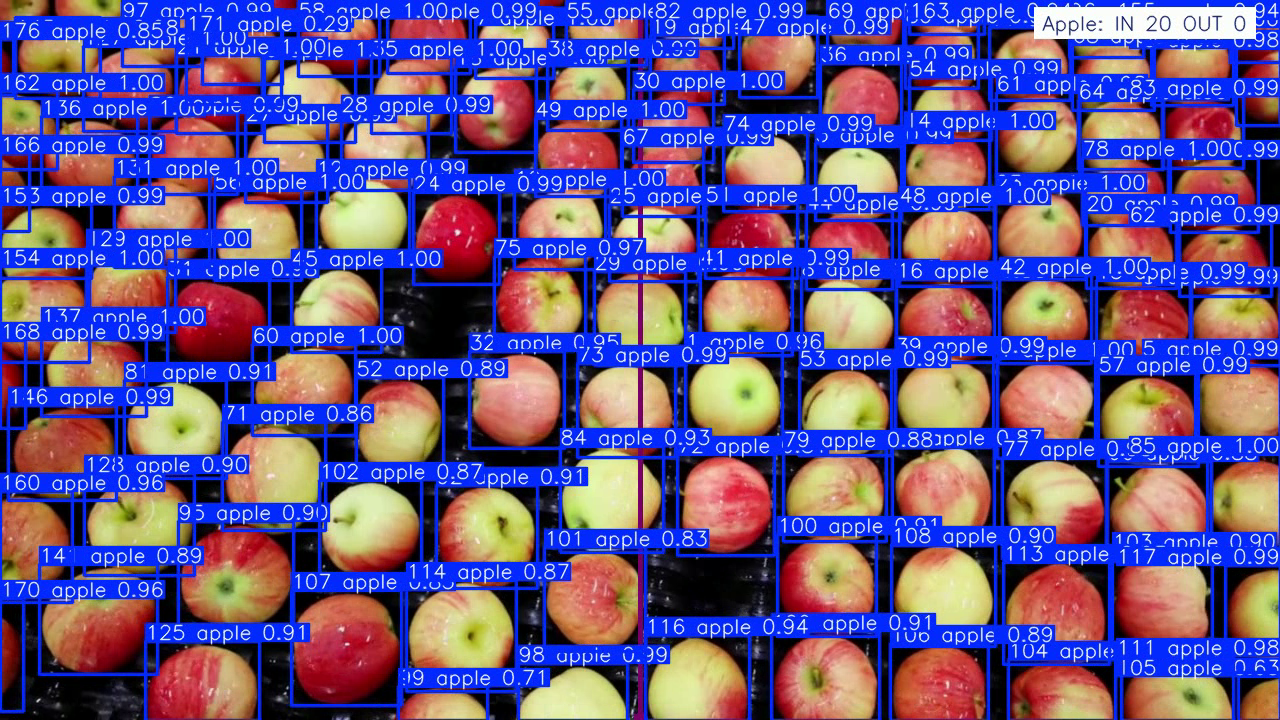

In [6]:
import cv2
from IPython.display import display
from PIL import Image

# Open the video
cap = cv2.VideoCapture("result.avi")

# Set to the specified frame (frame indices start at 0)
frame_number = 100
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

# Read the frame
ret, frame = cap.read()
cap.release()

if ret:
    # Convert BGR to RGB for proper display
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    display(Image.fromarray(frame_rgb))
else:
    print(f"Frame {frame_number} could not be read.")
